## Zenklub Challenge
### Federico Di Martino


### Challenge
Part of the journey of self development is understanding our emotions, and what causes them. To help our users on this endeavour we provide them with a Mood tracker, a tool that allows people to record how they feel and the reasons behind it. On top of that we also provide content to help people reflect, exercise and evolve their mental state.

Attached to this challenge you will find data related to those mood trackers, as well as some extra information about the users, where they work, and the content they consume.

You have been requested by management to present the following findings:
   1. A report that shows employee emotional state and evolution per industry they work on
   2. A report that shows the retention of the mood tracking feature
   3. We realised that content consumption has dropped at some point in time. Please present some potential explanation.



#### The Data
users - information about the users themselves

reasons - information about our reasons - Those are what makes someone feel a certain emotion

mood_tracker - information about each time users tracked their mood

content - information about our content (the ones users can see and consume/access)

content_display - information about which content was shown to each user

content_access - information about which content was consumed by the users


### Preliminary Activities
Importing necessary libraries, data and performing some minor wrangling.

In [1]:
# import libraries
import pandas as pd
import json
from pandas.io.json import json_normalize
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### import data from sql-generated csv
companies = pd.read_csv('companies.csv')
content_access = pd.read_csv('content_access.csv')
content_display = pd.read_csv('content_display.csv')
content = pd.read_csv('content.csv')
industries = pd.read_csv('industries.csv')
reasons = pd.read_csv('reasons.csv') 


### import data from json files
c_mood_tracker = open('mood_tracker.json')
mood_tracker = json.load(c_mood_tracker)
mood_tracker = json_normalize(mood_tracker) #converts neatly into dataframe
c_mood_tracker.close()


c_users = open('users.json')
users = json.load(c_users)
users = json_normalize(users)
c_users.close()

## minor cleaning of imported data
users['industryId'] = users['industryId'].astype(int)

## Convert time columns to datetime format
content_access['accessedAt'] = pd.to_datetime(content_access['accessedAt'], format="%Y-%m-%d %H:%M:%S")

content_display['displayedAt'] = pd.to_datetime(content_display['displayedAt'], format="%Y-%m-%d %H:%M:%S")

mood_tracker['trackedAt'] = pd.to_datetime(mood_tracker['trackedAt'], format="%Y-%m-%d %H:%M:%S")

## Create _Day column containg only Date info
content_access['accessedDay'] = content_access['accessedAt'].dt.date
content_display['displayedDay'] = content_display['displayedAt'].dt.date
mood_tracker['trackedDay'] = mood_tracker['trackedAt'].dt.date

### Part 1.
A report that shows employee emotional state and evolution per industry they work on. 

#### Overview
I first manipulate the data to show how general counts of each emotional state being logged varies day by day. I then break this down by industry.

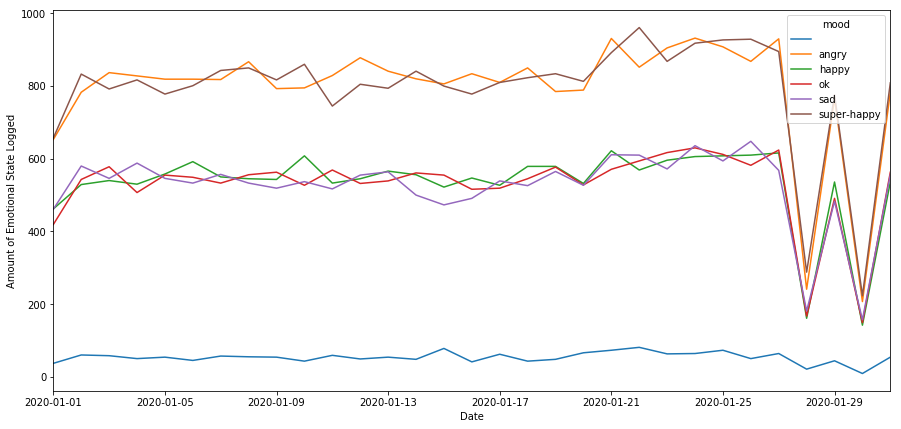

In [2]:
# First see how emotional states vary overall
# count sum of each emotional state for each day
mood_grouped = mood_tracker.groupby(['trackedDay','mood']).count()['trackedAt']
mood_grouped = mood_grouped.unstack()

#figsize = (8,8)
fig, ax = plt.subplots(figsize = (15,7))

p1 = mood_grouped.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Amount of Emotional State Logged')
plt.show(p1)

The logging of the different named moods all follow the same broad trend. An initial increase from the 1st (of January) to the 2nd, a plateau from then until the 21 when there's a smaller increase followed by another, shorter plateau. Finally, there is a double dip, on the 28th and 30th, wuth a small rebound on the 29th. The 31st sees an increase again.

Even if all the moods follow the same trends, angry and super happy are logged more than sad, ok and happy.

Don't know if blank mood corresponds to a mistake, an empty imput or something meaningful so leave it in for now. Important to note that it follows the same trends as the other moods, even if in an attenuated way.


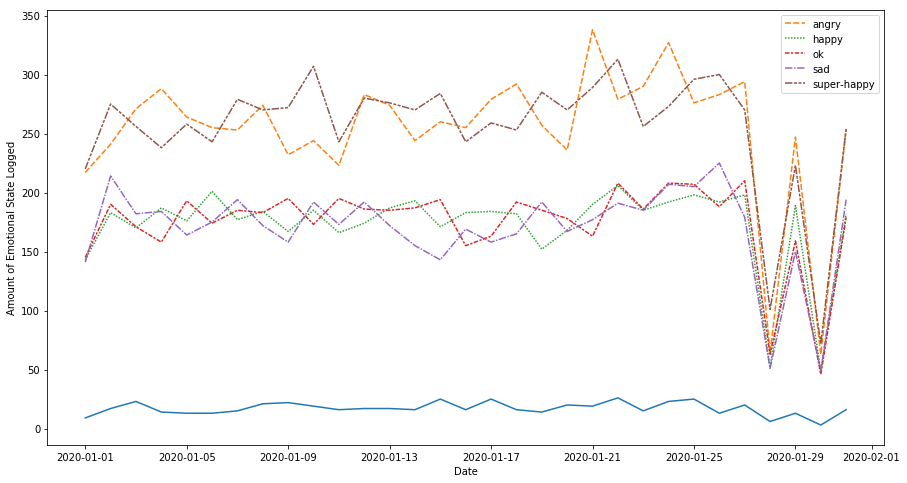

In [4]:
# Don't know if blank mood corresponds to a mistake, an empty imput or something meaningful
# so leave it in for now


## Now for each industry
# join industries onto users
# users_m short for users_merged
users_m = users.merge(industries, how="left", left_on="industryId", right_on = 'id')

users_m = users_m.rename(columns={'id_x': 'userId', 'name_x': 'userName', 'name_y':'industryName'})

# drop unneeded columns
users_m = users_m.drop(columns = ['id_y','age','companyId','industryId','userName'])

#merge onto mood_tracker
mood_m = mood_tracker.merge(users_m, how = 'left', on = 'userId')

# Separate out by industry
mood_tech = mood_m[mood_m['industryName'] == 'Tech']
mood_sales = mood_m[mood_m['industryName'] == 'Sales']
mood_marketing = mood_m[mood_m['industryName'] == 'Marketing']
mood_finance = mood_m[mood_m['industryName'] == 'Finance']

# unstack by industry
mood_tech_unstack = mood_tech.groupby(['trackedDay','mood']).count()['trackedAt'].unstack()
mood_sales_unstack = mood_sales.groupby(['trackedDay','mood']).count()['trackedAt'].unstack()
mood_marketing_unstack = mood_marketing.groupby(['trackedDay','mood']).count()['trackedAt'].unstack()
mood_finance_unstack = mood_finance.groupby(['trackedDay','mood']).count()['trackedAt'].unstack()



# Now plot by industry

plt.figure(figsize=(15,8))
p_tech = sns.lineplot(data = mood_tech_unstack)
p_tech.set(xlabel='Date', ylabel='Amount of Emotional State Logged')
plt.show(p_tech)



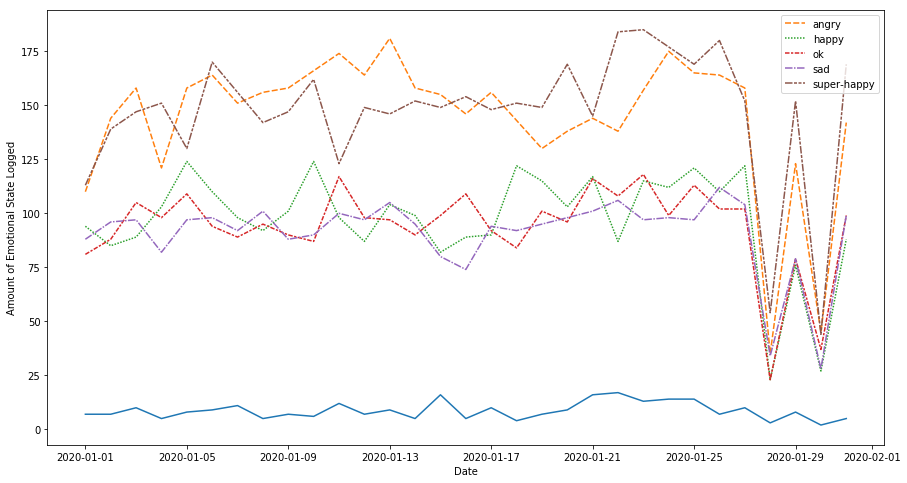

In [5]:
plt.figure(figsize=(15,8))
p_sales = sns.lineplot(data = mood_sales_unstack)
p_sales.set(xlabel='Date', ylabel='Amount of Emotional State Logged')
plt.show(p_sales)

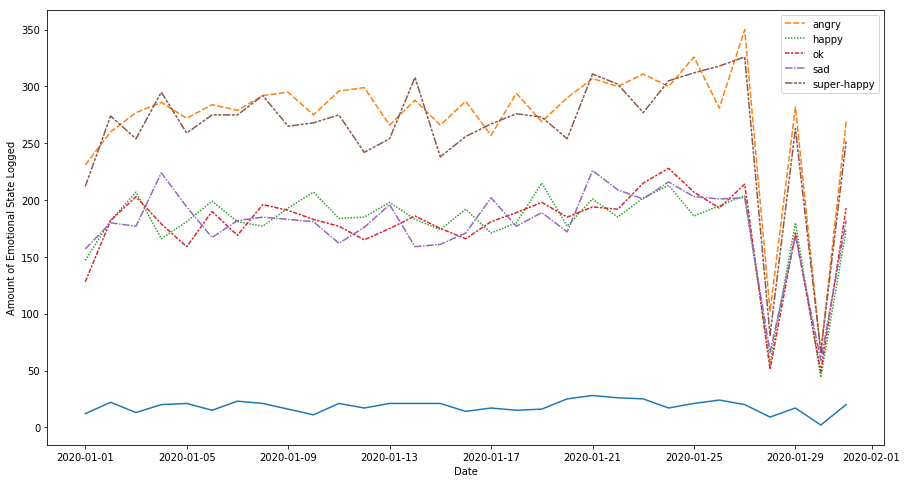

In [6]:
plt.figure(figsize=(15,8))
p_marketing = sns.lineplot(data = mood_marketing_unstack)
p_marketing.set(xlabel='Date', ylabel='Amount of Emotional State Logged')
plt.show(p_marketing)

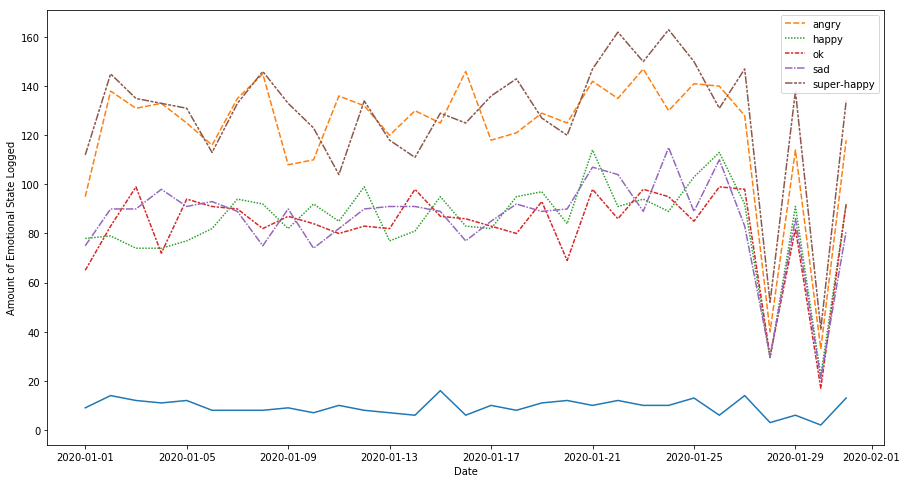

In [7]:
plt.figure(figsize=(15,8))
p_finance = sns.lineplot(data = mood_finance_unstack)
p_finance.set(xlabel='Date', ylabel='Amount of Emotional State Logged')
plt.show(p_finance)

The trends are the same for each industry. Crucially they all have the same double dip. The relative amount of each mood logged is also the same. I would conclude that the industry the user is employed in is not a factor in what moods they log. Notable that during the double dip, the moods are closer to each other.



### Part 2
##### A report that shows the retention of the mood tracking feature

0


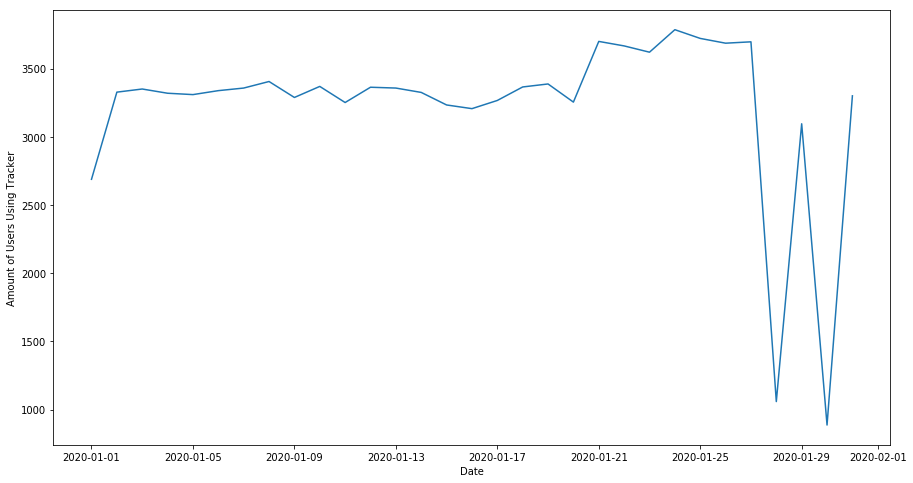

In [9]:
# Check if users tracking per day and moods tracked per day match
mood_daily_tracked = mood_tracker.groupby(['trackedDay']).count()['trackedAt']
mood_daily_users = mood_tracker.groupby(['trackedDay']).count()['userId']

print(sum(mood_daily_users - mood_daily_tracked)) # It's 0
# Exact match, don't have to worry about multiple input users

plt.figure(figsize=(15,8))
p_retention = sns.lineplot(data = mood_daily_users)
p_retention.set(xlabel='Date', ylabel='Amount of Users Using Tracker')
plt.show(p_retention)


The retention of the mood tracking feature follows the same trend as the individual moods. Possible explanations of the double dip become more important!


### Part 3
#### We realised that content consumption has dropped at some point in time. Please present some potential explanation.

To search for an explanation, look at the content display and content access data.

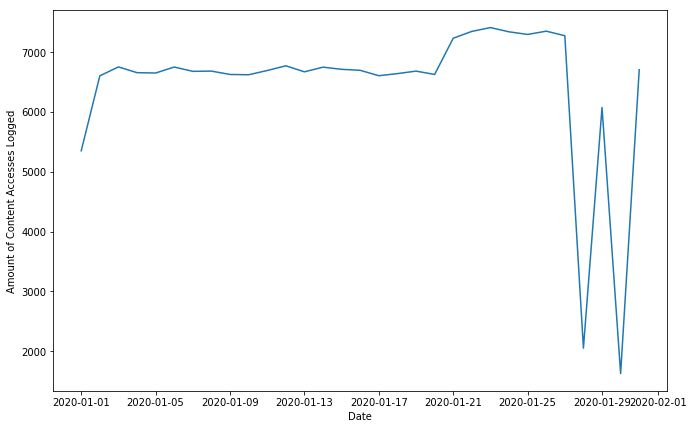

In [10]:
content_access_byday = content_access.groupby(['accessedDay']).count()['accessedAt']

plt.figure(figsize = (11,7))
p_access = sns.lineplot(data = content_access_byday)
p_access.set(xlabel='Date', ylabel='Amount of Content Accesses Logged')
plt.show(p_access)


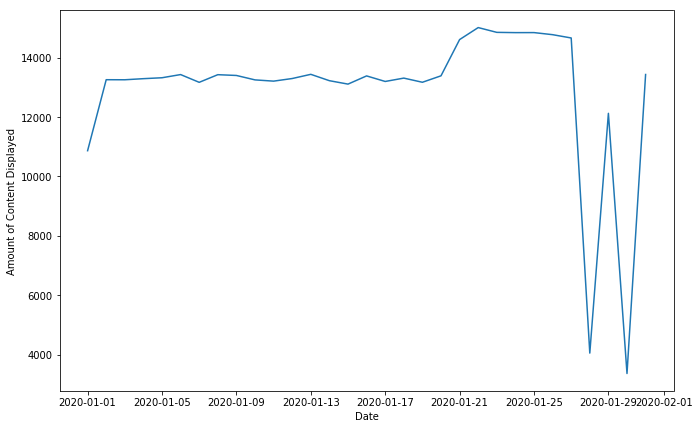

In [11]:
content_display_byday = content_display.groupby(['displayedDay']).count()['displayedAt']

plt.figure(figsize = (11,7))
p_display = sns.lineplot(data = content_display_byday)
p_display.set(xlabel='Date', ylabel='Amount of Content Displayed')
plt.show(p_display)

Again, the same trends. Since content accessed, displayed and moods tracked show the same trends, I believe that the dips might correspond to dips in users logging in for those days, as all user activity is down on the same dates. Next steps would be obtaining user login data for the month and data for any other data logged from user actions. If other user action data follows the trend, then it would confirm the idea that it is dips in user access that are occuring. The next question would then be why users are not logging on, or perhaps unable to log in, on certain days.